In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [212]:
df = pd.read_csv('code/school/lss-path-noevent-2.csv')

In [213]:
df.head(2)

,pagePath,region,percentScrolled,eventName,newVsReturning,city,dateHour,crashFreeUsersRate,bounceRate,engagementRate,userEngagementDuration,scrolledUsers,totalUsers,sessions
0,/,(not set),NaN,first_visit,new,(not set),2023090405,1,1.0,0.0,0,0,2,2
1,/,(not set),NaN,first_visit,new,(not set),2023090412,1,1.0,0.0,0,0,1,1


In [214]:
df['userEngagementDuration'].describe()

count    1259.000000
mean        3.035743
std        14.957316
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       295.000000
Name: userEngagementDuration, dtype: float64

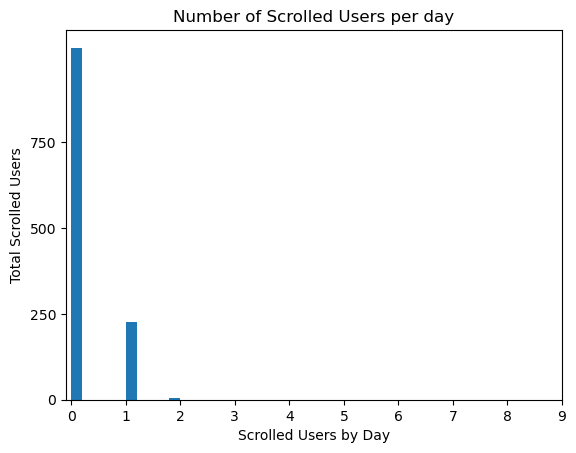

In [215]:
pyplot.hist(df['scrolledUsers'],align='mid', bins=10)

plt.xticks(np.arange(0, 10, 1))  
plt.yticks(np.arange(0, 800, 250)) 

# Optional: Add labels and title
plt.xlabel('Scrolled Users by Day')
plt.ylabel('Total Scrolled Users')
plt.title('Number of Scrolled Users per day')

pyplot.show()

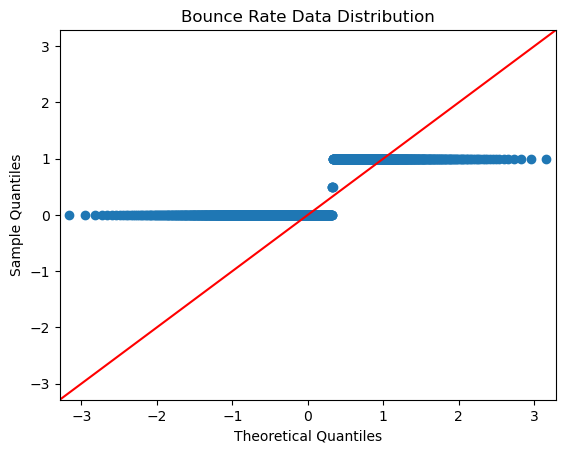

In [216]:
from statsmodels.graphics.gofplots import qqplot
fig = qqplot(df['bounceRate'], line='45')

# Add a title and labels (customize as needed)
plt.title('Bounce Rate Data Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Display the plot
plt.show()
pyplot.show()

/var/folders/hz/2krg0__n41v6b4bftv46dzpr0000gn/T/ipykernel_47404/3257122849.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10['pagePath'], rotation=45)


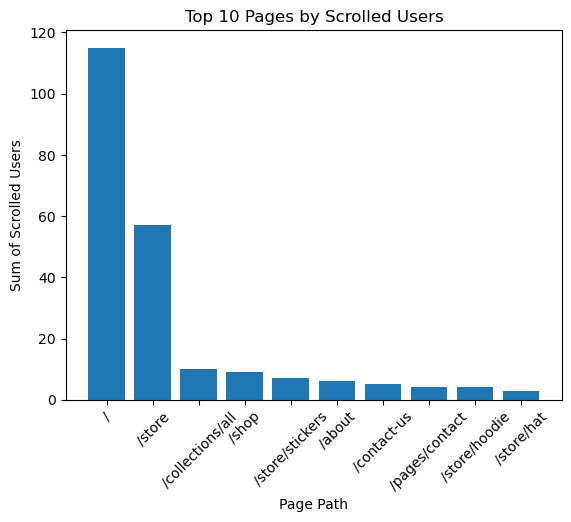

In [217]:
import matplotlib.pyplot as plt

# Group by 'pagePath' and sum (or average) 'scrolledUsers'
grouped_data = df.groupby('pagePath')['scrolledUsers'].sum().reset_index()

# Select the top 10 results
top_10 = grouped_data.nlargest(10, 'scrolledUsers')

# Plot
fig, ax = plt.subplots()
ax.bar(top_10['pagePath'], top_10['scrolledUsers'])

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(top_10['pagePath'], rotation=45)

ax.set_xlabel('Page Path')  # Label for the x-axis
ax.set_ylabel('Sum of Scrolled Users')  # Label for the y-axis

ax.set_title('Top 10 Pages by Scrolled Users')

plt.show()

/var/folders/hz/2krg0__n41v6b4bftv46dzpr0000gn/T/ipykernel_47404/3275060146.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10['pagePath'], rotation=45)


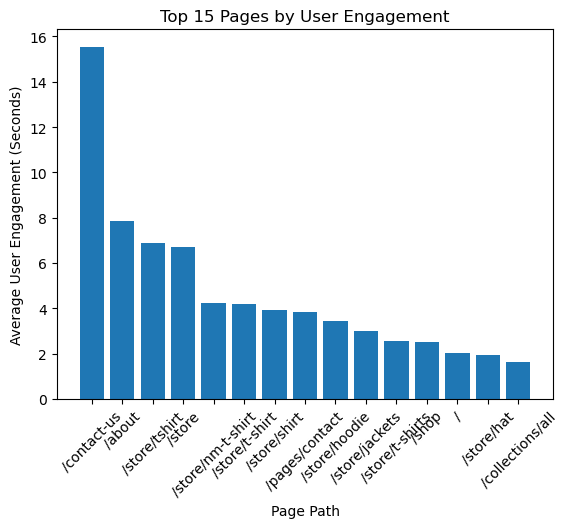

In [218]:
import matplotlib.pyplot as plt

# Group by 'pagePath' and sum (or average) 'scrolledUsers'
grouped_data = df.groupby('pagePath')['userEngagementDuration'].mean().reset_index()

# Select the top 10 results
top_10 = grouped_data.nlargest(15, 'userEngagementDuration')

# Plot
fig, ax = plt.subplots()
ax.bar(top_10['pagePath'], top_10['userEngagementDuration'])

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(top_10['pagePath'], rotation=45)

ax.set_xlabel('Page Path')  # Label for the x-axis
ax.set_ylabel('Average User Engagement (Seconds)')  # Label for the y-axis

ax.set_title('Top 15 Pages by User Engagement')

plt.show()

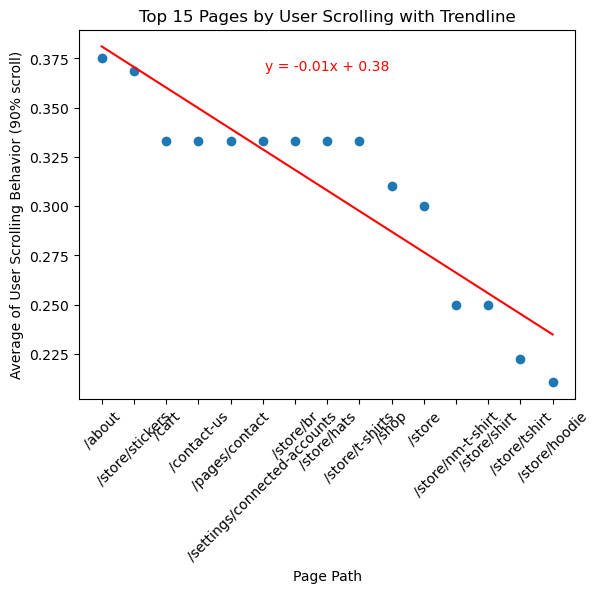

In [237]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Group by 'pagePath' and sum 'scrolledUsers'
grouped_data = df.groupby('pagePath')['scrolledUsers'].mean().reset_index()

# Select the top 10 results
top_10 = grouped_data.nlargest(15, 'scrolledUsers')

# Numerically encode 'pagePath'
top_10['pagePath_encoded'] = range(len(top_10))

# Plot
fig, ax = plt.subplots()
ax.scatter(top_10['pagePath_encoded'], top_10['scrolledUsers'])

# Fit a linear trendline
m, b = np.polyfit(top_10['pagePath_encoded'], top_10['scrolledUsers'], 1)

# Add the trendline
ax.plot(top_10['pagePath_encoded'], m*top_10['pagePath_encoded'] + b, color='red')

# Rotate the x-axis labels by 45 degrees and set the labels
ax.set_xticks(top_10['pagePath_encoded'])
ax.set_xticklabels(top_10['pagePath'], rotation=45)

# Adding labels to the axes
ax.set_xlabel('Page Path')  # Label for the x-axis
ax.set_ylabel('Average of User Scrolling Behavior (90% scroll)')  # Label for the y-axis

# Adding a title
ax.set_title('Top 15 Pages by User Scrolling with Trendline')  # Title for the plot

# Show trendline equation
ax.text(0.5, 0.9, f'y = {m:.2f}x + {b:.2f}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red')

plt.show()

In [220]:
dummies = pd.get_dummies(df['pagePath'], prefix='pagePath')

df = pd.concat([df, dummies], axis=1)

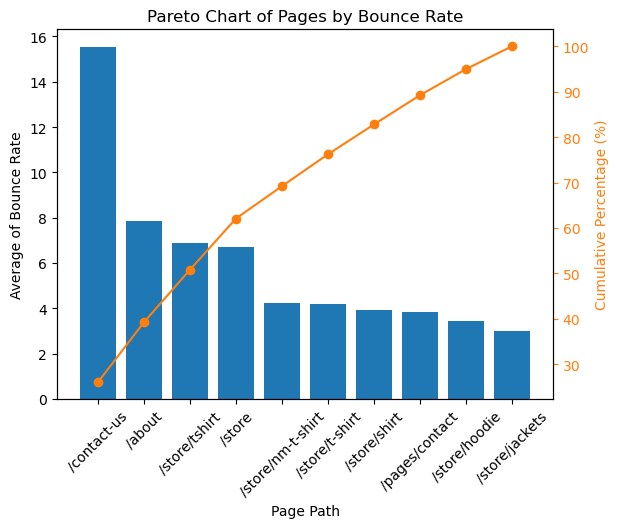

In [238]:

# Group by 'pagePath' and sum 'scrolledUsers'
grouped_data = df.groupby('pagePath')['userEngagementDuration'].mean().reset_index()

# Sort data in descending order
sorted_data_temp = grouped_data.sort_values(by='userEngagementDuration', ascending=False)

sorted_data = grouped_data.nlargest(10, 'userEngagementDuration')


# Calculate cumulative percentage
sorted_data['cumulative_percentage'] = sorted_data['userEngagementDuration'].cumsum() / sorted_data['userEngagementDuration'].sum() * 100

# Plot
fig, ax = pyplot.subplots()
ax.bar(sorted_data['pagePath'], sorted_data['userEngagementDuration'], color='C0')

# Secondary axis for the cumulative percentage
ax2 = ax.twinx()
ax2.plot(sorted_data['pagePath'], sorted_data['cumulative_percentage'], color='C1', marker='o')

# Set the y-axis label for cumulative percentage
ax2.set_ylabel('Cumulative Percentage (%)', color='C1')
ax2.tick_params(axis='y', colors='C1')

# Set the x-axis ticks and rotate labels by 45 degrees
ax.set_xticks(range(len(sorted_data['pagePath'])))  # Setting x-ticks at correct positions
ax.set_xticklabels(sorted_data['pagePath'], rotation=45)  # Aligning labels with these ticks

# Adding labels to the axes
ax.set_xlabel('Page Path')  # Label for the x-axis
ax.set_ylabel('Average of User Engagement')  # Label for the y-axis

# Adding a title
ax.set_title('Pareto Chart of Pages by User Engagement')  # Title for the plot

pyplot.show()


In [234]:
corr_matrix = df.corr()

# Define the correlation threshold (for example, 0.5)
threshold = 0.2

# Mask values below the threshold as NaN
filtered_corr = corr_matrix.where((np.abs(corr_matrix) > threshold) &  (np.abs(corr_matrix) < 1.0))

# Drop rows and columns with all NaN values as they don't meet the threshold
filtered_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)



,bounceRate,engagementRate,totalUsers,sessions,pagePath_/,pagePath_/collections/all,pagePath_/shop,pagePath_/store
bounceRate,NaN,NaN,NaN,NaN,0.279771,NaN,NaN,-0.254129
engagementRate,NaN,NaN,NaN,NaN,-0.279771,NaN,NaN,0.254129
totalUsers,NaN,NaN,NaN,0.971024,NaN,NaN,NaN,NaN
sessions,NaN,NaN,0.971024,NaN,NaN,NaN,NaN,NaN
pagePath_/,0.279771,-0.279771,NaN,NaN,NaN,-0.28553,-0.201332,-0.552782
pagePath_/collections/all,NaN,NaN,NaN,NaN,-0.285530,NaN,NaN,NaN
pagePath_/shop,NaN,NaN,NaN,NaN,-0.201332,NaN,NaN,NaN
pagePath_/store,-0.254129,0.254129,NaN,NaN,-0.552782,NaN,NaN,NaN


In [250]:
# Set up the ANOVA model
model = ols('scrolledUsers ~ pagePath', data=df).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=1)

# Display the ANOVA table
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
pagePath,25.0,7.248383,0.289935,1.826163,0.00784
Residual,1233.0,195.760354,0.158768,NaN,NaN
